In [2]:
import geopandas as gp
import pandas as pd
import geocoder
import numpy as np
%matplotlib inline

In [3]:
data = gp.read_file('E:\Transit-Casa-Alex\Output\Census Block Data/2009/Census_Block_Data.shp')

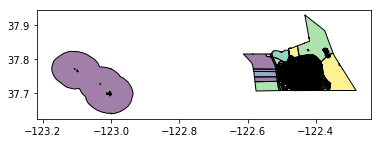

In [81]:
data.plot()

In [4]:
stops = gp.read_file('E:/Transit-Casa-Alex/Input/Bus_Stops/2009/Post-Deleted_Stops/Bus_Stops.shp')

In [5]:
data['centroid'] = data.centroid

In [9]:
data.head()

,ALAND10_x,ALAND10_y,AWATER10,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,...,UATYP10,UR10,Unnamed_ 0,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,centroid
0,182505.545918,16958.0,0.0,2002.0,6.075021e+13,6.075021e+13,75.0,16.0,7.0,61.0,...,U,U,0.0,20160228.0,20160228.0,"POLYGON ((-122.440616 37.75090199999977, -122....","POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,POINT (-122.4410750952718 37.75006645242288)
1,181052.857519,16823.0,0.0,2000.0,6.075021e+13,6.075021e+13,75.0,19.0,0.0,79.0,...,U,U,1.0,20160228.0,20160228.0,"POLYGON ((-122.438397 37.75022599999975, -122....","POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,POINT (-122.4389330377124 37.75019580711344)
2,183174.823888,17020.0,0.0,3004.0,6.075021e+13,6.075021e+13,75.0,25.0,0.0,84.0,...,U,U,2.0,20160228.0,20160228.0,"POLYGON ((-122.435808 37.75762299999975, -122....","POLYGON ((-122.435808 37.757623, -122.435642 3...",6.075021e+13,6.075021e+13,POINT (-122.4362701327225 37.75679372444293)
3,176663.550351,16415.0,0.0,1003.0,6.075021e+13,6.075021e+13,75.0,10.0,8.0,58.0,...,U,U,3.0,20160228.0,20160228.0,"POLYGON ((-122.436527 37.75353999999976, -122....","POLYGON ((-122.436527 37.75354, -122.436454 37...",6.075021e+13,6.075021e+13,POINT (-122.4370498299397 37.75352911966451)
4,188584.943478,17523.0,0.0,4001.0,6.075021e+13,6.075021e+13,75.0,22.0,1.0,90.0,...,U,U,4.0,20160228.0,20160228.0,"POLYGON ((-122.432331 37.75622699999975, -122....","POLYGON ((-122.432331 37.756227, -122.432254 3...",6.075021e+13,6.075021e+13,POINT (-122.4334002333296 37.75575797076656)


In [10]:
data.head()

,ALAND10_x,ALAND10_y,AWATER10,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,...,UATYP10,UR10,Unnamed_ 0,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,centroid
0,182505.545918,16958.0,0.0,2002.0,6.075021e+13,6.075021e+13,75.0,16.0,7.0,61.0,...,U,U,0.0,20160228.0,20160228.0,"POLYGON ((-122.440616 37.75090199999977, -122....","POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,POINT (-122.4410750952718 37.75006645242288)
1,181052.857519,16823.0,0.0,2000.0,6.075021e+13,6.075021e+13,75.0,19.0,0.0,79.0,...,U,U,1.0,20160228.0,20160228.0,"POLYGON ((-122.438397 37.75022599999975, -122....","POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,POINT (-122.4389330377124 37.75019580711344)
2,183174.823888,17020.0,0.0,3004.0,6.075021e+13,6.075021e+13,75.0,25.0,0.0,84.0,...,U,U,2.0,20160228.0,20160228.0,"POLYGON ((-122.435808 37.75762299999975, -122....","POLYGON ((-122.435808 37.757623, -122.435642 3...",6.075021e+13,6.075021e+13,POINT (-122.4362701327225 37.75679372444293)
3,176663.550351,16415.0,0.0,1003.0,6.075021e+13,6.075021e+13,75.0,10.0,8.0,58.0,...,U,U,3.0,20160228.0,20160228.0,"POLYGON ((-122.436527 37.75353999999976, -122....","POLYGON ((-122.436527 37.75354, -122.436454 37...",6.075021e+13,6.075021e+13,POINT (-122.4370498299397 37.75352911966451)
4,188584.943478,17523.0,0.0,4001.0,6.075021e+13,6.075021e+13,75.0,22.0,1.0,90.0,...,U,U,4.0,20160228.0,20160228.0,"POLYGON ((-122.432331 37.75622699999975, -122....","POLYGON ((-122.432331 37.756227, -122.432254 3...",6.075021e+13,6.075021e+13,POINT (-122.4334002333296 37.75575797076656)


In [6]:
data['LON'] = data['centroid'].apply(lambda row: row.x)

In [7]:
data['LAT'] = data['centroid'].apply(lambda row: row.y)

In [6]:
data.columns

Index(['ALAND10_x', 'ALAND10_y', 'AWATER10', 'BLOCKCE10', 'BLOCKID10',
       'BLOCK_ID', 'COUNTYFP10', 'EDHLTH_RAC', 'EDHLTH_WAC', 'EMP_RAC',
       'EMP_WAC', 'FUNCSTAT10', 'GEOID10', 'HOUSING_09', 'INTPTLAT10',
       'INTPTLON10', 'LEISER_RAC', 'LEISER_WAC', 'MTFCC10', 'NAME10',
       'OTHER_RAC', 'OTHER_WAC', 'RETAIL_RAC', 'RETAIL_WAC', 'STATEFP10',
       'TRACTCE10', 'UACE10', 'UATYP10', 'UR10', 'Unnamed_ 0', 'createda_1',
       'createdate', 'geometry', 'geometry_y', 'h_geocode', 'w_geocode',
       'centroid', 'LON', 'LAT'],
      dtype='object')

In [8]:
keep = ['LAT','LON','EMP_WAC','EMP_RAC']

In [9]:
data_points = data[keep]

In [9]:
data_points.head()

,LAT,LON,EMP_WAC,EMP_RAC
0,37.750066,-122.441075,7.0,61.0
1,37.750196,-122.438933,1.0,79.0
2,37.756794,-122.436270,1.0,84.0
3,37.753529,-122.437050,22.0,58.0
4,37.755758,-122.433400,3.0,90.0


In [10]:
geocoder.google([data.LAT[0],data.LON[0]],method = 'reverse')

<[OVER_QUERY_LIMIT] Google - Reverse>

In [10]:
data_points.to_csv('E:/Transit-Casa-Alex/Accessbility_Points.csv')

In [43]:
data.head()

,ALAND10_x,ALAND10_y,AWATER10,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,...,Unnamed_ 0,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,centroid,LON,LAT
0,182505.545918,16958.0,0.0,2002.0,6.075021e+13,6.075021e+13,75.0,16.0,7.0,61.0,...,0.0,20160228.0,20160228.0,"POLYGON ((-122.440616 37.75090199999977, -122....","POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,POINT (-122.4410750952718 37.75006645242288),-122.441075,37.750066
1,181052.857519,16823.0,0.0,2000.0,6.075021e+13,6.075021e+13,75.0,19.0,0.0,79.0,...,1.0,20160228.0,20160228.0,"POLYGON ((-122.438397 37.75022599999975, -122....","POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,POINT (-122.4389330377124 37.75019580711344),-122.438933,37.750196
2,183174.823888,17020.0,0.0,3004.0,6.075021e+13,6.075021e+13,75.0,25.0,0.0,84.0,...,2.0,20160228.0,20160228.0,"POLYGON ((-122.435808 37.75762299999975, -122....","POLYGON ((-122.435808 37.757623, -122.435642 3...",6.075021e+13,6.075021e+13,POINT (-122.4362701327225 37.75679372444293),-122.436270,37.756794
3,176663.550351,16415.0,0.0,1003.0,6.075021e+13,6.075021e+13,75.0,10.0,8.0,58.0,...,3.0,20160228.0,20160228.0,"POLYGON ((-122.436527 37.75353999999976, -122....","POLYGON ((-122.436527 37.75354, -122.436454 37...",6.075021e+13,6.075021e+13,POINT (-122.4370498299397 37.75352911966451),-122.437050,37.753529
4,188584.943478,17523.0,0.0,4001.0,6.075021e+13,6.075021e+13,75.0,22.0,1.0,90.0,...,4.0,20160228.0,20160228.0,"POLYGON ((-122.432331 37.75622699999975, -122....","POLYGON ((-122.432331 37.756227, -122.432254 3...",6.075021e+13,6.075021e+13,POINT (-122.4334002333296 37.75575797076656),-122.433400,37.755758


In [16]:
def reverse_geocode(row,lat_col,lon_col):
   
    add = geocoder.google([row[lat_col],row[lon_col]],method = 'reverse')
    print(add.address)
    return add.address

In [97]:
stops[0:1]

,STOP_ID,STOP_LAT,STOP_LON,geometry
0,390,37.72119,-122.475096,POINT (-122.475096 37.72119)


In [80]:
data['ADDRESS'] = data.apply(lambda row: reverse_geocode(row,'LAT','LON'),axis = 1)

7386


In [72]:
data.head()

,ALAND10_x,ALAND10_y,AWATER10,BLOCKCE10,BLOCKID10,BLOCK_ID,COUNTYFP10,EDHLTH_RAC,EDHLTH_WAC,EMP_RAC,...,createda_1,createdate,geometry,geometry_y,h_geocode,w_geocode,centroid,LON,LAT,ADDRESS
0,182505.545918,16958.0,0.0,2002.0,6.075021e+13,6.075021e+13,75.0,16.0,7.0,61.0,...,20160228.0,20160228.0,"POLYGON ((-122.440616 37.75090199999977, -122....","POLYGON ((-122.440616 37.750902, -122.440459 3...",6.075021e+13,6.075021e+13,POINT (-122.4410750952718 37.75006645242288),-122.441075,37.750066,None
1,181052.857519,16823.0,0.0,2000.0,6.075021e+13,6.075021e+13,75.0,19.0,0.0,79.0,...,20160228.0,20160228.0,"POLYGON ((-122.438397 37.75022599999975, -122....","POLYGON ((-122.438397 37.750226, -122.43832 37...",6.075021e+13,6.075021e+13,POINT (-122.4389330377124 37.75019580711344),-122.438933,37.750196,None
2,183174.823888,17020.0,0.0,3004.0,6.075021e+13,6.075021e+13,75.0,25.0,0.0,84.0,...,20160228.0,20160228.0,"POLYGON ((-122.435808 37.75762299999975, -122....","POLYGON ((-122.435808 37.757623, -122.435642 3...",6.075021e+13,6.075021e+13,POINT (-122.4362701327225 37.75679372444293),-122.436270,37.756794,None
3,176663.550351,16415.0,0.0,1003.0,6.075021e+13,6.075021e+13,75.0,10.0,8.0,58.0,...,20160228.0,20160228.0,"POLYGON ((-122.436527 37.75353999999976, -122....","POLYGON ((-122.436527 37.75354, -122.436454 37...",6.075021e+13,6.075021e+13,POINT (-122.4370498299397 37.75352911966451),-122.437050,37.753529,None
4,188584.943478,17523.0,0.0,4001.0,6.075021e+13,6.075021e+13,75.0,22.0,1.0,90.0,...,20160228.0,20160228.0,"POLYGON ((-122.432331 37.75622699999975, -122....","POLYGON ((-122.432331 37.756227, -122.432254 3...",6.075021e+13,6.075021e+13,POINT (-122.4334002333296 37.75575797076656),-122.433400,37.755758,None


In [14]:
first = data[0:2500]
second = data[2501:5001]
third = data[5002:-1]

In [17]:
first['ADDRESS'] = first.apply(lambda row: reverse_geocode(row,'LAT','LON'),axis = 1)

49 Fountain St, San Francisco, CA 94114, USA
820 Douglass St, San Francisco, CA 94114, USA
342 Collingwood St, San Francisco, CA 94114, USA
545 Eureka St, San Francisco, CA 94114, USA
3855 21st St, San Francisco, CA 94114, USA
547 Hill St, San Francisco, CA 94114, USA
560 Duncan St, San Francisco, CA 94131, USA
1100-1122 Bosworth St, San Francisco, CA 94131, USA
553 Valley St, San Francisco, CA 94131, USA
260 Moreland St, San Francisco, CA 94131, USA
130 Sussex St, San Francisco, CA 94131, USA
172 Addison St, San Francisco, CA 94131, USA
727 Chenery St, San Francisco, CA 94131, USA
San Jose Avenue, San Francisco, CA 94131, USA
3951 20th St, San Francisco, CA 94114, USA
2131 3rd St, San Francisco, CA 94107, USA
1210 Pennsylvania Ave, San Francisco, CA 94107, USA
Southern Embarcadero Fwy, San Francisco, CA 94107, USA
3255a 3rd St, San Francisco, CA 94124, USA
1455 Custer Ave, San Francisco, CA 94124, USA
1640 Jerrold Ave, San Francisco, CA 94124, USA
1639 Quesada Ave, San Francisco, CA 9

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
second['ADDRESS'] = second.apply(lambda row: reverse_geocode(row,'LAT','LON'),axis = 1)

In [ ]:
third['ADDRESS'] = third.apply(lambda row: reverse_geocode(row,'LAT','LON'),axis = 1)